In [9]:
import jax
import jax.numpy as jnp           ## JAX
import jax.scipy.stats as stats   ## JAX
import numpy as np
#import scipy.stats as stats

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Probability distributions

- We would like to describe a distribution of data in concisely. For example, the normal distribution with only two parameters $\mu$ and $\sigma$ may represent any data of such distribution.

In [10]:
datafile_url = 'https://raw.githubusercontent.com/avehtari/ROS-Examples/master/PearsonLee/data/Heights.txt'
df = pd.read_csv(datafile_url, delimiter=' ')
df

,daughter_height,mother_height
0,52.5,59.5
1,52.5,59.5
2,53.5,59.5
3,53.5,59.5
4,55.5,59.5
...,...,...
5519,71.5,70.5
5520,73.5,63.5
5521,73.5,63.5
5522,73.5,63.5


In [11]:
mean, std = df['daughter_height'].mean(), df['daughter_height'].std()

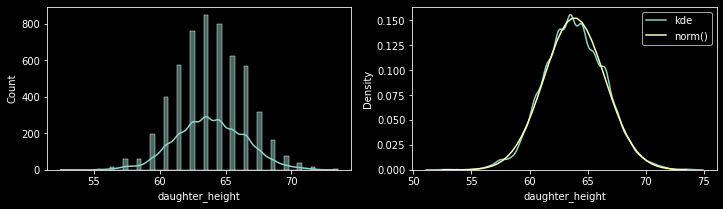

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))
sns.histplot(df['daughter_height'], kde=True, ax=axes[0]);
#
sns.kdeplot(df['daughter_height'], ax=axes[1], label='kde')
x = jnp.linspace(df['daughter_height'].min(), df['daughter_height'].max(), 50)
axes[1].plot(x, stats.norm.pdf(loc=mean, scale=std, x=x), label='norm()');
axes[1].legend();

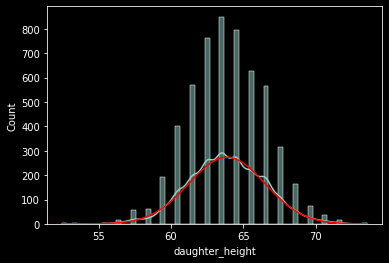

In [13]:
ax = sns.histplot(df['daughter_height'], kde=True);
x = jnp.linspace(df['daughter_height'].min(), df['daughter_height'].max(), 50)
ax.plot(x, 1800*stats.norm.pdf(loc=mean, scale=std, x=x), color='red');

**Try** with `mother_height`.

Normal Distribution
$$
    p(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\bigg\{ -\frac{z^2}{2} \bigg\} , \quad  z=\frac{x-\mu}{\sigma}
$$

$$
    F(X < x|\mu, \sigma) = \int_{-\infty}^x \frac{1}{\sigma\sqrt{2\pi}} \exp\bigg\{ -\frac{z^2}{2} \bigg\} dx, \quad  z=\frac{x-\mu}{\sigma}
$$

# Expectations and Simulation with Pseudo Random Sampling

## Expectation
- A function $f$ is called a linear operator if $f(ax+by) = af(x) + bf(y)$ for all $x$ and $y$ and constants $a$ and $b$

- Expectation

\begin{align}
        \mathbb{E}[f(X)] & = \sum_i p(x_i) f(x_i) \quad\mbox{PMF}\\
                         & = \int_\Omega dx p(x) f(x) \quad\mbox{PDF}
\end{align}

-  Expection is a linear operator:

\begin{align}
        \mathbb{E}[aX + bY] & = \sum_{x,y}(ax + by)p_{X,Y}(x,y) \\
                            & = \sum_x \sum_y (ax p_{X,Y}(x, y)) + \sum_x \sum_y(by p_{X,Y}(x,y))\\
                            & = \sum_x \left(
                              ax \sum_y (p_{X,Y}(x, y))
                            \right)
                             +
                            \sum_y
                            \left(
                              by \sum_x p_{X,Y}(x,y)
                            \right) \\
                            & = a\mathbb{E}[X] + b\mathbb{E}[Y]
\end{align}


- Examples

$$
    \mathbb{E}[X] = \int_\Omega dx p(x) x \\
    \mathbb{E}[X^2] = \int_\Omega dx p(x) x^2
$$

- Useful Formula.

\begin{align}
    \mathbb{E}[X] & = \mu \\
    \mathbb{E}[ a X + b ] & = a \mathbb{E}[X] + b  \\
    \mathbb{V}[X] & = \mathbb{E}[ (X-\mu)^2 ] = \sigma^2 = \mathbb{E}[X^2] - \mu^2 \\
    \mathbb{V}[aX+b] & = \mathbb{E}[ (aX-a\mu)^2 ] = a^2\mathbb{E}[ (X-\mu)^2 ] =a^2 \mathbb{V}[X]
\end{align}

In [14]:
!pip3 install numpyro

  Using cached jax-0.2.10.tar.gz (589 kB)
     |█████████▊                      | 10.8 MB 428 kB/s eta 0:00:59^C

ERROR: Operation cancelled by user


## Simulation
Calculation with samples.

In [3]:
import jax
import numpy as np

In [4]:
key = jax.random.PRNGKey(0)
key2, subkey = jax.random.split(key)
key, key2

(DeviceArray([0, 0], dtype=uint32),
 array([4146024105,  967050713], dtype=uint32))

In [20]:
n_samples = 10

### Experiment with Normal Distribution

In [21]:
# rs = stats.norm.rvs(loc=0, scale=1, size=(n_samples))
rs = jax.random.normal(key, shape=(n_samples,))  # standard normal
rs, rs.shape, rs.size

(DeviceArray([-0.3721109 ,  0.26423115, -0.18252768, -0.7368197 ,
              -0.44030377, -0.1521442 , -0.67135346, -0.5908641 ,
               0.73168886,  0.5673026 ], dtype=float32),
 (10,),
 10)

In [22]:
# expection
mean = rs.sum() / n_samples
# variance = mean of squared deviation from the mean
var = np.sum((rs - mean)**2) / n_samples
# standard deviation = sqrt of var
std = np.sqrt(var)

In [23]:
print(mean, std)

-0.15829012 0.49071363


Now a random variable which is equivalent to the affinely transformed version.

In [ ]:
np.random.seed(1999)

In [50]:

# X_2 = X * a + b
# rs2 = stats.norm.rvs(loc=5, scale=2, size=n_samples)
key, subkey = jax.random.split(key)
rs2 = jax.random.normal(key, shape=(1,)) * 2 + 5
rs2

DeviceArray([3.1819239], dtype=float32)

In [32]:
n_samples = 10

In [4]:
key, subkey = jax.random.split(key)
key, key2

(DeviceArray([0, 0], dtype=uint32),
 array([4146024105,  967050713], dtype=uint32))

In [51]:
# X_2 = X * a + b
# rs2 = stats.norm.rvs(loc=5, scale=2, size=n_samples)
rs2 = jax.random.normal(key2, shape=(n_samples,)) * 2 + 5

In [52]:
# expection
mean2 = rs2.sum() / n_samples
# variance = mean of squared deviation from the mean
var2 = np.sum((rs2 - mean2)**2) / n_samples
# standard deviation = sqrt of var
std2 = np.sqrt(var2)

In [53]:
print(mean2, std2)

4.9434137 2.19168


The result may also be obtained by simple affine transformation:

In [54]:
# apply the formula to get the mean and std for X_2
mean22 = 2*mean + 5
var22 = 2**2 * var2
std22 = np.sqrt(var22)
print(mean22, std22)

4.6834197 4.38336


- The difference is caused by the computation from samples.
- By increasing the number of samples, the difference do decrease. 
- With infinitely many samples, no difference will occur.

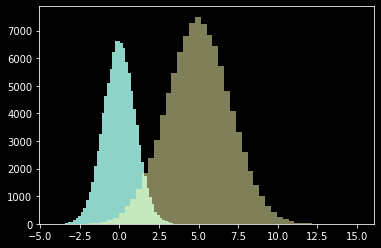

In [15]:
plt.hist(rs, bins=50);
plt.hist(rs2, alpha=.5, bins=50);

### Experiment with Uniform Distribution [a,b]

$$
    V[X] = \frac{1}{12}(b - a)^2
$$
$$
    V[X] = \int_a^b (x-\mu)^2 p(x) dx, \quad p(x) = \frac{1}{b-1}\quad\mbox{for}\quad x \in [a,b]
$$

In [55]:
n_samples = 100000

In [56]:
# rs = stats.norm.rvs(loc=0, scale=1, size=(n_samples))
rs = jax.random.uniform(key, shape=(n_samples,))  # standard uniform [0, 1]
rs

DeviceArray([0.5644661 , 0.46449828, 0.7148756 , ..., 0.67715013,
             0.56519306, 0.79678285], dtype=float32)

In [57]:
# expection
mean = rs.sum() / n_samples
# variance = mean of squared deviation from the mean
var = np.sum((rs - mean)**2) / n_samples
# standard deviation = sqrt of var
std = np.sqrt(var)

In [58]:
print(mean, std)

0.5011125 0.28780124


Now a random variable which is equivalent to the affinely transformed version.

In [19]:
# X_2 = X * a + b
rs2 = jax.random.uniform(key2, shape=(n_samples,)) * 2 + 5

In [20]:
# expection
mean2 = rs2.sum() / n_samples
# variance = mean of squared deviation from the mean
var2 = np.sum((rs2 - mean2)**2) / n_samples
# standard deviation = sqrt of var
std2 = np.sqrt(var2)

In [21]:
print(mean2, std2)

5.9994454 0.5773667


The result may also be obtained by simple affine transformation:

In [22]:
# apply the formula to get the mean and std for X_2
mean22 = 2*mean + 5
var22 = 2**2 * var2
std22 = np.sqrt(var22)
print(mean22, std22)

6.003106 1.1547334


- The difference is caused by the computation from samples.
- By increasing the number of samples, the difference do decrease. 
- With infinitely many samples, no difference will occur.

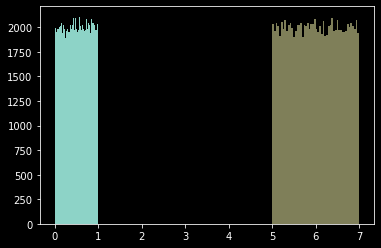

In [23]:
plt.hist(rs, bins=50);
plt.hist(rs2, alpha=.5, bins=50);

## Sum of Random Variables
Let's think about a new random variable $Y$:
\begin{align}
    Y & = X_1 + X_2 
\end{align}
where $X_i$s are independent random variables.

Its expections are:
\begin{align}
    \mathbb{E}[Y] & = \mathbb{E}[X_1] + \mathbb{E}[X_2] \quad \mbox{so},\quad \mu_Y = \mu_{X_1} + \mu_{X_2}\\
    \mathbb{V}[Y] & = \mathbb{E}[(Y-\mu_Y)^2] \quad \mbox(show)\\
                  & = \mathbb{V}[X_1] + \mathbb{V}[X_2] \\
    Std(Y) &= \sqrt{Std(X_1)^2 + Std(X_2)^2 }
\end{align}

In [24]:
n_samples = 1000000

In [25]:
X1 = jax.random.normal(key, shape=(n_samples,)) * 2 + 3
X2 = jax.random.normal(key2, shape=(n_samples,)) * 2 + 7

In [26]:
Y = X1 + X2

In [27]:
X1.mean(), X2.mean(), Y.mean()

(DeviceArray(3.0006726, dtype=float32),
 DeviceArray(7.00012, dtype=float32),
 DeviceArray(10.000792, dtype=float32))

In [28]:
X1.std(), X2.std(), Y.std(), jnp.sqrt(X1.std()**2 + X2.std()**2)

(DeviceArray(2.001163, dtype=float32),
 DeviceArray(1.9993248, dtype=float32),
 DeviceArray(2.8304346, dtype=float32),
 DeviceArray(2.8287723, dtype=float32))

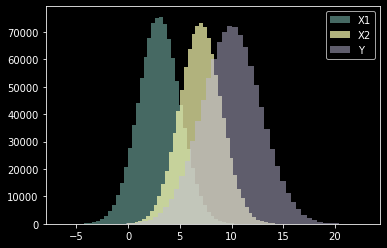

In [29]:
bins=50
plt.hist(X1, bins=bins, alpha=.5, label='X1');
plt.hist(X2, alpha=.7, bins=bins, label='X2');
plt.hist(Y, alpha=.5, bins=bins, label='Y');
plt.legend();

Do the same with two uniform distributions.

## Difference of Random Variables
Let's think about a new random variable $Y$:
\begin{align}
    Y & = X_1 - X_2 
\end{align}
where $X_i$s are independent random variables.

Its expections are:
\begin{align}
    \mathbb{E}[Y] & = \mathbb{E}[X_1] - \mathbb{E}[X_2] \quad \mbox{so},\quad \mu_Y = \mu_{X_1} - \mu_{X_2}\\
    \mathbb{V}[Y] & = \mathbb{E}[(Y-\mu_Y)^2] \quad \mbox(show)\\
                  & = \mathbb{V}[X_1] + \mathbb{V}[X_2] \\
    Std(Y) &= \sqrt{Std(X_1)^2 + Std(X_2)^2 } \quad\quad\mbox{the same!}
\end{align}

In [30]:
n_samples = 100000

In [31]:
X1 = jax.random.normal(key , shape=(n_samples,)) * 2 + 5
X2 = jax.random.normal(key2, shape=(n_samples,)) * 2 + 15

In [32]:
Y = X2 - X1

In [33]:
X1.mean(), X2.mean(), Y.mean()

(DeviceArray(5.0102243, dtype=float32),
 DeviceArray(14.998878, dtype=float32),
 DeviceArray(9.988653, dtype=float32))

In [34]:
X1.std(), X2.std(), Y.std(), jnp.sqrt(X1.std()**2 + X2.std()**2)

(DeviceArray(1.998879, dtype=float32),
 DeviceArray(1.9983485, dtype=float32),
 DeviceArray(2.8233986, dtype=float32),
 DeviceArray(2.8264666, dtype=float32))

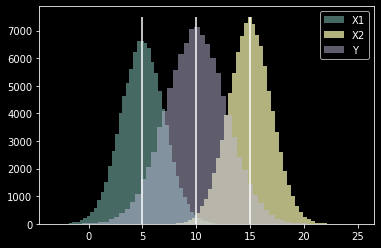

In [35]:
bins=50
plt.hist(X1, bins=bins, alpha=.5, label='X1');
plt.hist(X2, alpha=.7, bins=bins, label='X2');
plt.hist(Y, alpha=.5, bins=bins, label='Y');
plt.vlines(x=[5, 10, 15], ymin=0, ymax=7500)
plt.legend();

Let's try it with two **uniform distributions**.

```scipy.stats.uniform``:
In the standard form, the distribution is uniform on `[0, 1]`. Using the parameters `loc` and `scale`, one obtains the uniform distribution on `[loc, loc + scale]`.

In [36]:
X1 = jax.random.uniform(key , shape=(n_samples,)) * 2 + 0
X2 = jax.random.uniform(key2, shape=(n_samples,)) * 2 + 3

In [37]:
Y = X1 - X2

In [38]:
X1.mean(), X2.mean(), Y.mean()

(DeviceArray(1.0031061, dtype=float32),
 DeviceArray(3.9994462, dtype=float32),
 DeviceArray(-2.9963396, dtype=float32))

In [39]:
X1.std(), X2.std(), Y.std(), np.sqrt(X1.std()**2 + X2.std()**2)

(DeviceArray(0.57671154, dtype=float32),
 DeviceArray(0.57736677, dtype=float32),
 DeviceArray(0.8153302, dtype=float32),
 0.8160567)

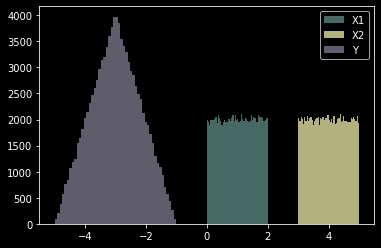

In [40]:
bins=50
plt.hist(X1, bins=bins, alpha=.5, label='X1');
plt.hist(X2, alpha=.7, bins=bins, label='X2');
plt.hist(Y, alpha=.5, bins=bins, label='Y');
plt.legend();

Implications:
- The difference is normal if $X_1$ and $X_2$ is normals.

## Mean of Random Variables
Let's think about a new random variable $Y$:
\begin{align}
    Y & = \frac{1}{n}\sum_i X_i
\end{align}
where $X_i$s are independent identically distributed (iid) random variables with mean $\mu$ and std $\sigma$.

Its expections are:
\begin{align}
    \mathbb{E}[Y] & = \frac{1}{n}\sum_i \mathbb{E}[X_i] = \mu\\
    \mathbb{V}[Y] & = \mathbb{V}\bigg[\frac{1}{n}\sum_i X_i\bigg] \\
                  & = \frac{1}{n^2}\mathbb{V}\bigg[\sum_i X_i\bigg] \\
                  & = \frac{1}{n^2}\sum_i\mathbb{V}\big[X_i\big] \quad\mbox{independence, uncorrelated}\\
                  & = \frac{1}{n^2}\sum_i \sigma^2 \\
                  & = \frac{1}{n} \sigma^2 \\
    Std(Y) &= \frac{\sigma}{\sqrt{n}}   \quad \mbox{called 'standard error'}
\end{align}
- Implication:
    - $Y$ is a mean estimator. It is a function that tries to estimate the mean of the distribution of r.v. $X$.
    - measure as many $X$'s as possible, and compute its mean $Y$.
    - the expectation of $Y$ approaches to the true mean $\mu$ in the limit.
    - the standard deviation of $Y$ approaches to 0.
    - the std of $Y$ is actually the error of the mean estimator $Y$. So it is called the **standard error** (SE).

In [41]:
n_samples = 10000
std = 1

In [42]:
# gengerate 10000 samples, each of which is of size n
n = 10
X_s = jax.random.normal(key, shape=(n_samples, n)) * std
X_s.shape

(10000, 10)

In [43]:
# mean of n samples
Y_samples = X_s.sum(axis=1) / n   # 
Y_samples.shape

(10000,)

In [44]:
Y_samples.mean(),  std/jnp.sqrt(n), Y_samples.std(), 

(DeviceArray(0.00511253, dtype=float32),
 DeviceArray(0.31622776, dtype=float32),
 DeviceArray(0.31535438, dtype=float32))

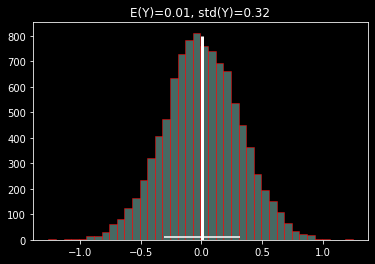

In [45]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.2f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

If the number of samples gets larger, the standard error gets smaller.

In [46]:
n = 100
X_s = jax.random.normal(key, shape=(n_samples, n)) * std
X_s.shape

(10000, 100)

In [47]:
Y_samples = X_s.sum(axis=1) / n   # 
Y_samples.shape

(10000,)

In [48]:
Y_samples.mean(),  std/jnp.sqrt(n), Y_samples.std(), 

(DeviceArray(0.00033591, dtype=float32),
 DeviceArray(0.1, dtype=float32),
 DeviceArray(0.09996284, dtype=float32))

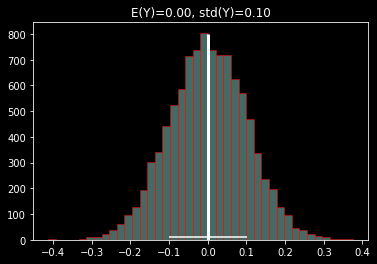

In [49]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.2f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

### Uniform distribution [0,1]

In [50]:
std_theory = jnp.sqrt(1/12.)
print('std of U[0,1] = ', std_theory)

std of U[0,1] =  0.28867513


In [51]:
# Sampling from Uniform distriubtion.
n = 100
X_s = jax.random.uniform(key, shape=(n_samples, n) )  ## standard uniform
Y_samples = X_s.sum(axis=1) / n
print(Y_samples.mean(), Y_samples.std(), std_theory/jnp.sqrt(n))

0.5000573 0.028791878 0.028867513


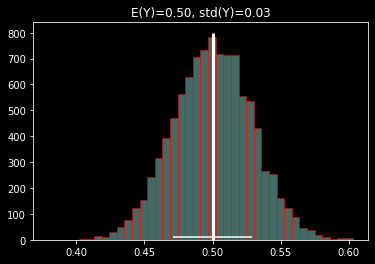

In [52]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.2f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

### A non-symmetric distribution

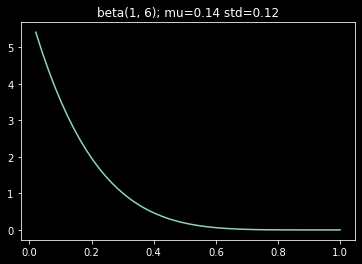

In [53]:
# sampling from non-symmetric distribution
# dist = stats.beta(1,6)
#
x = jnp.linspace(0,1,50)
a, b = 1, 6
pdf_ns = jax.scipy.stats.beta.pdf(x, a=a, b=b)
mean_ns = a / (a + b)
std_ns = jnp.sqrt( a*b / ( (a+b)**2 * (a + b + 1) ) )
plt.plot(x, pdf_ns);
plt.title(f'beta(1, 6); mu={mean_ns:.2f} std={std_ns:.2f}');

In [54]:
# Sampling
n = 100
X_s = jax.random.beta(key, a=a, b=b, shape=(n_samples, n))
Y_samples = X_s.sum(axis=1) / n
print(Y_samples.mean(), Y_samples.std(), std_ns/jnp.sqrt(n))

0.14295611 0.01242958 0.012371792


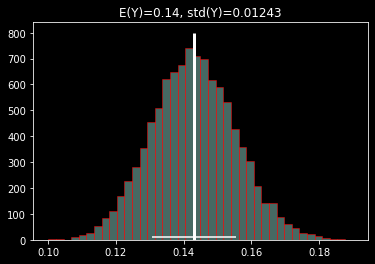

In [55]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.5f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

---
Now, let's think about the situation when we have only one set of observed samples 

$$
S = \{x_i | x_i \sim p(x) , \quad i = 1, ..., n\}
$$

where $p(x)$ is a probabilty distribution. This is a practical case.

Then, 
- The sample mean is $Y = \sum x_i / n$. 
    This is an estimate of the mean of $X$ or $\mathbb{E}(X)$.
- The sample standard deviation of $S$ is $s = std(S)$. 
    - This is an estimate of the standard deviation $\sigma$ of $X$.
- The sample standard error $se = s\big/\sqrt{n}$ is an estimate of the standard error $\sigma\big/\sqrt{n}$.

In [56]:
# Normal distribution
n = 100
mean, std = 0, 1
print(f'normal({mean}, {std}): mu={mean}, std={std}, se={std/10}')
S = jax.random.normal(key, shape=(n,))
Y = S.mean()
std = S.std()
se = S.std() / np.sqrt(n)
print(f'Y: {Y}, std: {std}, se: {se}')

normal(0, 1): mu=0, std=1, se=0.1
Y: 0.08212993294000626, std: 0.9407106041908264, se: 0.09407106041908264


In [57]:
# Uniform distribution
mean, std = 1./2, np.sqrt(1./12)
print(f'uniform: mu={mean}, std={std}, se={std/10}')
n = 100
S = jax.random.uniform(key, shape=(n,))
Y = S.mean()
std = S.std()
se = S.std() / np.sqrt(n)
print(f'Y: {Y}, std: {std}, se: {se}')

uniform: mu=0.5, std=0.28867513459481287, se=0.028867513459481287
Y: 0.5246013402938843, std: 0.27877211570739746, se: 0.027877211570739746


jupyter nbconvert rv_n_distribution.ipynb --to webpdf --HTMLExporter.theme=dark --allow-chromium-download --execute

https://blog.jupyter.org/the-templating-system-of-nbconvert-6-47ea781eacd2

In [59]:
!jupyter nbconvert rv_n_distribution_numpyro_jax.ipynb --to webpdf --HTMLExporter.theme=dark --allow-chromium-download

[NbConvertApp] Converting notebook rv_n_distribution_numpyro_jax.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 327751 bytes to rv_n_distribution_numpyro_jax.pdf
